In [3]:
# import PmagPy functions
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import numpy as np


# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 13

## Problem 1a

We are supposed to convert these sets of six measurements into eigenvalues and eigenvectors either using the  **pmag.doseigs()**.  Let's look at the help message for that function. 

In [18]:
!s_eigs.py -f Chapter_13/prob13-1.dat

0.33127221 238.60  44.99 0.33351415 127.32  19.96 0.33521360  20.66  38.27
0.33178046 282.36   2.54 0.33218098 183.25  74.32 0.33603853  13.06  15.46
0.33047003 283.62  26.77 0.33328289 118.33  62.45 0.33624706  16.67   6.02
0.33123812 260.84  12.43 0.33377630 138.38  67.68 0.33498558 355.01  18.24
0.33085683 255.86   7.02 0.33379161 131.50  77.69 0.33535153 347.11  10.06
0.33175951 268.72  27.32 0.33405060 171.02  14.54 0.33418992  56.02  58.46
0.33195049 261.85  21.86 0.33313221  90.81  67.90 0.33491731 353.10   3.12
0.33157605 281.50  21.78 0.33312118 117.51  67.43 0.33530280  13.76   5.64


And now we have to save the results in another data file, so that we can run **eigs_s.py** to convert back to six measurements....

In [19]:
!s_eigs.py -f Chapter_13/prob13-1.dat >Chapter_13/prob13-1a.dat

For the second way, let's take a look at the help message from the **pmag.doseigs** function: 

In [4]:
help(pmag.doseigs)

Help on function doseigs in module pmagpy.pmag:

doseigs(s)
    convert s format for eigenvalues and eigenvectors
    
    Parameters
    __________
    s=[x11,x22,x33,x12,x23,x13] : the six tensor elements
    
    Return
    __________
        tau : [t1,t2,t3]
           tau is an list of eigenvalues in decreasing order:
        V : [[V1_dec,V1_inc],[V2_dec,V2_inc],[V3_dec,V3_inc]]
            is an list of the eigenvector directions



Let's read in the data file and take a look at it

In [5]:
Ss=np.loadtxt('Chapter_13/prob13-1.dat')
Ss

array([[  3.34126800e-01,   3.32827420e-01,   3.33045840e-01,
         -1.52920000e-04,   1.24846000e-03,   1.35721000e-03],
       [  3.35563000e-01,   3.31982640e-01,   3.32454320e-01,
          8.72600000e-04,   2.41380000e-04,   9.61680000e-04],
       [  3.35849080e-01,   3.31406240e-01,   3.32744720e-01,
          1.31844000e-03,   1.18815000e-03,   2.98800000e-05],
       [  3.34797590e-01,   3.31425310e-01,   3.33777190e-01,
         -4.74910000e-04,   4.95400000e-04,   4.43000000e-04],
       [  3.35056130e-01,   3.31148480e-01,   3.33795370e-01,
         -1.01373000e-03,   2.85360000e-04,   3.48490000e-04],
       [  3.34061560e-01,   3.32269130e-01,   3.33669250e-01,
         -2.26500000e-05,   9.85440000e-04,   5.55500000e-05],
       [  3.34865930e-01,   3.32160350e-01,   3.32973720e-01,
         -3.54920000e-04,   3.92540000e-04,   1.54020000e-04],
       [  3.35106430e-01,   3.31964020e-01,   3.32929580e-01,
          7.59680000e-04,   5.72420000e-04,   1.01100000e-04]])

Now we can use **pmag.doseigs()** to convert it to eigenparameters

In [6]:

for s in Ss:
    tau,V=pmag.doseigs(s)
    print (tau)
    print (V)
    


[0.3352136, 0.33351415, 0.33127221]
[[20.662039409151422, 38.274365358236665], [127.31680250654536, 19.962940849237739], [238.60467598448855, 44.98549243911264]]
[0.33603853, 0.33218098, 0.33178046]
[[13.063809127349078, 15.460809002428485], [183.25246970185907, 74.320917881229846], [282.35970974209101, 2.5439188115862277]]
[0.33624706, 0.33328289, 0.33047003]
[[16.666602433389283, 6.0206398913404229], [118.33065046463975, 62.450088179274722], [283.61612303991484, 26.773940171853788]]
[0.33498558, 0.3337763, 0.33123812]
[[355.00708219784917, 18.238192090957398], [138.3792091127298, 67.676681649196823], [260.84231026156766, 12.429005753503176]]
[0.33535153, 0.33379161, 0.33085683]
[[347.11070038471189, 10.059364205742341], [131.50149548647209, 77.691170673480428], [255.85899923417003, 7.0200830176759155]]
[0.33418992, 0.3340506, 0.33175951]
[[56.022587855562342, 58.458227180089914], [171.02213115632478, 14.542030544487146], [268.72216472446081, 27.317493354409702]]
[0.33491731, 0.333132

## Problem 1b

Let's see if we can get back to where we started:

In [7]:
help(pmag.doeigs_s)

Help on function doeigs_s in module pmagpy.pmag:

doeigs_s(tau, Vdirs)
     get elements of s from eigenvaulues - note that this is very unstable
     Input:
         tau,V:
           tau is an list of eigenvalues in decreasing order:
              [t1,t2,t3]
           V is an list of the eigenvector directions
              [[V1_dec,V1_inc],[V2_dec,V2_inc],[V3_dec,V3_inc]]
    Output:
        The six tensor elements as a list:
          s=[x11,x22,x33,x12,x23,x13]



So back the other way: 

In [8]:
for s in Ss:
    print ('original: ',s)
    tau,V=pmag.doseigs(s) # to tau, V
    news1=pmag.doeigs_s(tau,V)
    print ('new 1: ',news1)
    tau,V=pmag.doseigs(news1)
    news2=pmag.doeigs_s(tau,V)
    print ('new 2: ',news2)
    tau,V=pmag.doseigs(news2)
    news3=pmag.doeigs_s(tau,V)
    print ('new 3: ',news3)
    # and so on.... 


original:  [  3.34126800e-01   3.32827420e-01   3.33045840e-01  -1.52920000e-04
   1.24846000e-03   1.35721000e-03]
new 1:  [  3.34126770e-01   3.32827389e-01   3.33045810e-01  -1.52907363e-04
   1.24846096e-03   1.35721581e-03]
new 2:  [  3.34126770e-01   3.32827419e-01   3.33045810e-01  -1.52903973e-04
   1.24845875e-03   1.35722104e-03]
new 3:  [  3.34126800e-01   3.32827389e-01   3.33045781e-01  -1.52909357e-04
   1.24844746e-03   1.35721464e-03]
original:  [  3.35563000e-01   3.31982640e-01   3.32454320e-01   8.72600000e-04
   2.41380000e-04   9.61680000e-04]
new 1:  [  3.35563004e-01   3.31982642e-01   3.32454324e-01   8.72602861e-04
   2.41379530e-04   9.61677579e-04]
new 2:  [  3.35563004e-01   3.31982642e-01   3.32454324e-01   8.72607750e-04
   2.41379676e-04   9.61675774e-04]
new 3:  [  3.35563004e-01   3.31982642e-01   3.32454324e-01   8.72606353e-04
   2.41378249e-04   9.61668091e-04]
original:  [  3.35849080e-01   3.31406240e-01   3.32744720e-01   1.31844000e-03
   1.18815

Not too bad, but not identical.  If we repeat this a few times, or with fewer significan digits we really get in trouble fast.... 

## Problem 1c

First we have to convert the data to the MagIC format with s\_magic.py

In [29]:
!s_magic.py -h


    NAME
        s_magic.py

    DESCRIPTION
        converts .s format data to magic_measurements  format.

    SYNTAX
        s_magic.py [command line options]

    OPTIONS
        -h prints help message and quits
        -DM DATA_MODEL_NUM data model number (default is 3)
        -f SFILE specifies the .s file name
        -sig last column has sigma
        -typ Anisotropy type:  AMS,AARM,ATRM (default is AMS)
        -F FILE specifies the specimens formatted file name
        -usr USER specify username
        -loc location specify location/study name
        -spc NUM : specify number of characters to
              designate a  specimen, default = 0
        -spn SPECNAME, this specimen has the name SPECNAME
        -n first column has specimen name
        -crd [s,g,t], specify coordinate system of data
           s=specimen,g=geographic,t=tilt adjusted, default is 's'
        -ncn NCON: naming convention
       Sample naming convention:
            [1] XXXXY: where XXXX is an arb

The data in the prob13-1.dat datafile only has six numbers, so we don't need the -sig option.  They are AMS data, so -typ AMS is the default...   

In [30]:
!s_magic.py -f Chapter_13/prob13-1.dat

8  records written to file  /Users/ltauxe/Dropbox/4Jeff/SIO247_2018/Problems/Chapter_13/specimens.txt
data saved in  /Users/ltauxe/Dropbox/4Jeff/SIO247_2018/Problems/Chapter_13/specimens.txt


Now for the plotting.  

In [31]:
!aniso_magic.py -h


    NAME
        aniso_magic.py

    DESCRIPTION
        plots anisotropy data with either bootstrap or hext ellipses

    SYNTAX
        aniso_magic.py [-h] [command line options]
    OPTIONS
        -h plots help message and quits
        -usr USER: set the user name
        -f AFILE, specify specimens.txt formatted file for input
        -fsa SAMPFILE, specify samples.txt file (required to plot by site)
        -fsi SITEFILE, specify site file (required to include location information)
        -x Hext [1963] and bootstrap
        -B DON'T do bootstrap, do Hext
        -par Tauxe [1998] parametric bootstrap
        -v plot bootstrap eigenvectors instead of ellipses
        -sit plot by site instead of entire file
        -crd [s,g,t] coordinate system, default is specimen (g=geographic, t=tilt corrected)
        -P don't make any plots - just fill in the specimens, samples, sites tables
        -sav don't make the tables - just save all the plots
        -fmt [svg, jpg, eps] format 

Let's try the "Hext" method first (without bootstrapping).  The default input file is the "specimens.txt" file we just created.   

In [35]:
!aniso_magic.py -B  -sav -fmt png

1  saved in  unknown_s_aniso-data.png
2  saved in  unknown_s_aniso-conf.png


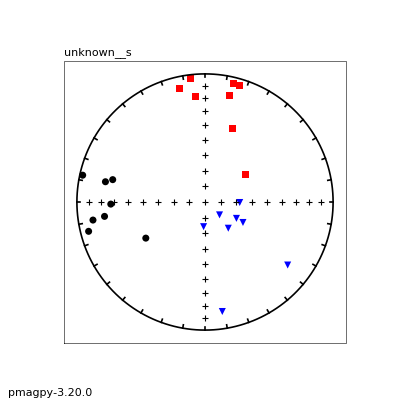

In [36]:
from IPython.display import Image
Image(filename='unknown_s_aniso-data.png')

Figure 1:  Cumulative distributions of eigenvalues and their 95\% confidence limits.  This data set is clearly triaxial in shape as all three eigenvalues are distinct.  

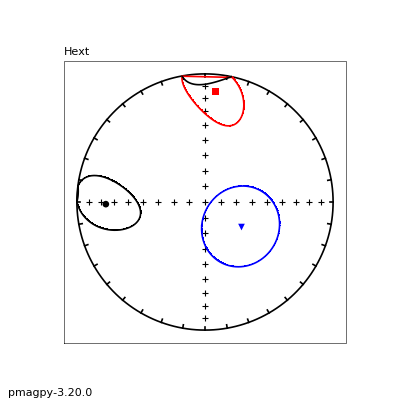

In [37]:
Image(filename='unknown_s_aniso-conf.png')

Figure 2:  The minimum directions cluster in a horizontal/East-West direction and the maxima are clustered horizontal/North-South.  

Figure 3: Plot of mean directions of maximum (squares), intermediate (triangles) and minimum (dots) eigenvectors with Hext confidence ellipses.  Now I will try plotting the bootstrapped eigenvectors:

In [38]:
!aniso_magic.py -f specimens.txt -v  -sav -fmt png

Doing bootstrap - be patient
1  saved in  unknown_s_aniso-data.png
2  saved in  unknown_s_aniso-conf.png
3  saved in  unknown_s_aniso-tcdf.png


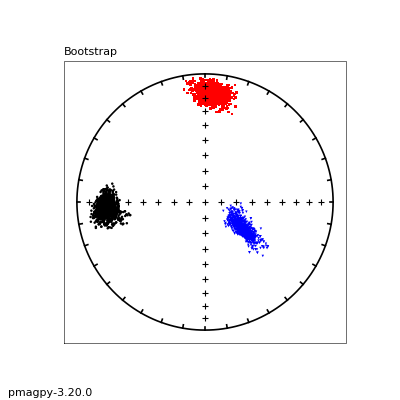

In [39]:
Image(filename='unknown_s_aniso-conf.png')

Figure 4:  The bootrapped clouds follow the data better.   

Here is the version for just the bootstrapped ellipses:

In [42]:
!aniso_magic.py -sav -fmt png

Doing bootstrap - be patient
1  saved in  unknown_s_aniso-data.png
2  saved in  unknown_s_aniso-conf.png
3  saved in  unknown_s_aniso-tcdf.png


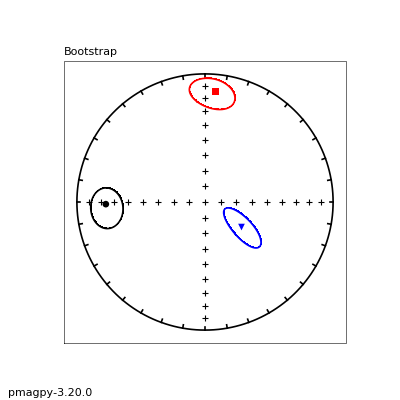

In [43]:
Image(filename='unknown_s_aniso-conf.png')

Figure 5:  The confidence ellipses follow the data much better than the Hext ellipses do.  But maybe they are too "skinny" because of insufficient data?   

## Problem 2a

First we need to read in the dike orientation information with Pandas, transform them to their poles, save the data to a file.  We can use Pandas and Numpy for this.

In [44]:
import pandas as pd
import numpy as np

In [45]:
dd=pd.read_csv("Chapter_13/dike.dd",delim_whitespace=True,header=None) #read in data
dd=pd.DataFrame(dd) # make a Pandas DataFrame
dd.columns=["DipDir","Dip"] # Assign column headers
dd['PoleDip']=90.-dd['Dip'] # find the pole dip
poles=np.array([dd["DipDir"],dd["PoleDip"]]).transpose() # make a numpy array
np.savetxt('poles.out',poles) # save the data in a file


First let's do the **gofish.py** way: 

In [46]:
!gofish.py <poles.out # calculation the mean bedding pole

  103.9    18.4    7     4.7450      2.7    46.2    49.7


And for us notebook lovers, the **ipmag.fisher_mean** way:

In [47]:
ipmag.fisher_mean(di_block=poles)

{'alpha95': 46.191359900402126,
 'csd': 49.657726212930342,
 'dec': 103.86274387036212,
 'inc': 18.402093151299596,
 'k': 2.6607028719617651,
 'n': 7,
 'r': 4.7449567694208055}

## Problem 2b

To convert the data to MagIC formatted files, we use **k15_magic.py** 

In [48]:
!k15_magic.py -h


    NAME
        k15_magic.py

    DESCRIPTION
        converts .k15 format data to magic_measurements  format.
        assums Jelinek Kappabridge measurement scheme

    SYNTAX
        k15_magic.py [-h] [command line options]

    OPTIONS
        -h prints help message and quits
        -DM DATA_MODEL: specify data model 2 or 3 (default 3)
        -f KFILE: specify .k15 format input file
        -F MFILE: specify measurement output file
        -Fsa SFILE, specify sample file for output
        -Fa AFILE, specify specimen file for output [rmag_anisotropy for data model 2 only]
    #-ins INST: specify instrument that measurements were made on # not implemented
        -spc NUM: specify number of digits for specimen ID, default is 0
        -ncn NCOM: specify naming convention (default is #1)
       Sample naming convention:
            [1] XXXXY: where XXXX is an arbitrary length site designation and Y
                is the single character sample designation.  e.g., TG001a is the
  

In [49]:
!k15_magic.py -f Chapter_13/east.k15 -Fa east_specimens.txt
!k15_magic.py -f Chapter_13/west.k15 -Fa west_specimens.txt

Using default arguments for: -F, -A, -WD, -ID, -Fsa, -Fsi, -Fr, -spc, -ncn, -loc, -DM
7  records written to file  ./samples.txt
28  records written to file  ./east_specimens.txt
105  records written to file  ./measurements.txt
Data saved to: ./measurements.txt, ./east_specimens.txt, ./samples.txt
Using default arguments for: -F, -A, -WD, -ID, -Fsa, -Fsi, -Fr, -spc, -ncn, -loc, -DM
12  records written to file  ./samples.txt
20  records written to file  ./west_specimens.txt
75  records written to file  ./measurements.txt
Data saved to: ./measurements.txt, ./west_specimens.txt, ./samples.txt


## Problem 2c

Plot 'em up.  

Here is how to plot the geographic coordinates (-crd g), suppress the bootstrap (-B) and plot the Hext ellipes .  We save the plots with the -sav option with format (-fmt) png.  

In [50]:
!aniso_magic.py -f east_specimens.txt -B -crd g -sav -fmt png

1  saved in  unknown_g_aniso-data.png
2  saved in  unknown_g_aniso-conf.png


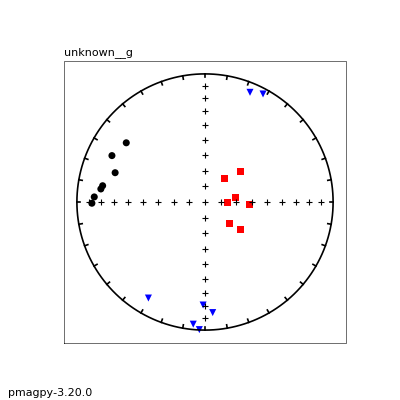

In [51]:
Image('unknown_g_aniso-data.png')

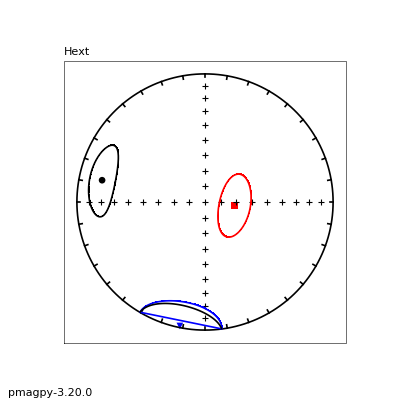

In [52]:
Image('unknown_g_aniso-conf.png')

In [53]:
!aniso_magic.py -f west_specimens.txt -B -crd g -sav -fmt png

1  saved in  unknown_g_aniso-data.png
2  saved in  unknown_g_aniso-conf.png


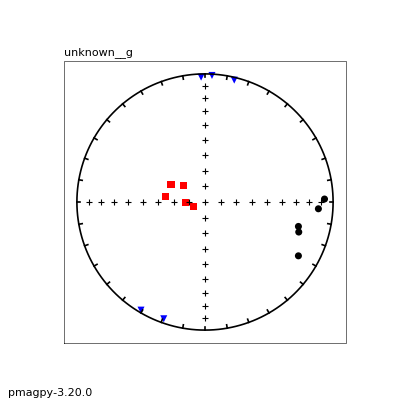

In [54]:
Image('unknown_g_aniso-data.png')

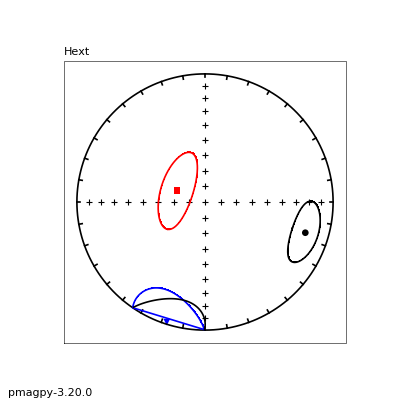

In [55]:
Image('unknown_g_aniso-conf.png')

Let's do the parametric (-par) bootstrap eigenvectors and plot them out (-v option).

In [56]:
!aniso_magic.py -f east_specimens.txt -crd g -par -v -sav -fmt png

Doing bootstrap - be patient
1  saved in  unknown_g_aniso-data.png
2  saved in  unknown_g_aniso-conf.png
3  saved in  unknown_g_aniso-tcdf.png


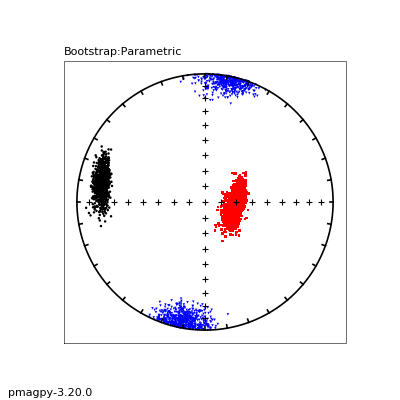

In [57]:
Image("unknown_g_aniso-conf.png")

Doing bootstrap - be patient
1  saved in  unknown_g_aniso-data.png
2  saved in  unknown_g_aniso-conf.png
3  saved in  unknown_g_aniso-tcdf.png


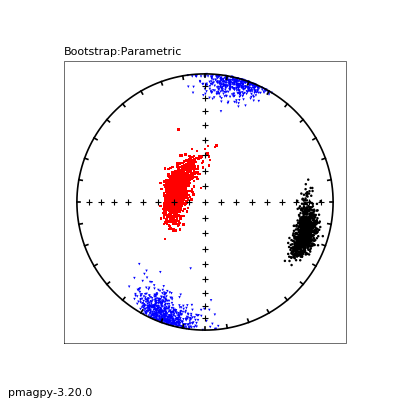

In [58]:
!aniso_magic.py -f west_specimens.txt -crd g -par -v -sav -fmt png
Image("unknown_g_aniso-conf.png")

The two methods of estimating confidence bounds give results that are similar, but the bootstrapped eigenvectors seem to follow the trends in the data much more faithfully.  

## Problem 2d

We now recall the dike pole from problem 2a and plot it along with the data from each margin.   

In [59]:
!aniso_magic.py -gtc 103.9    18.4 -f east_specimens.txt -crd g -par -v -sav -fmt png

Doing bootstrap - be patient
1  saved in  unknown_g_aniso-data.png
2  saved in  unknown_g_aniso-conf.png
3  saved in  unknown_g_aniso-tcdf.png


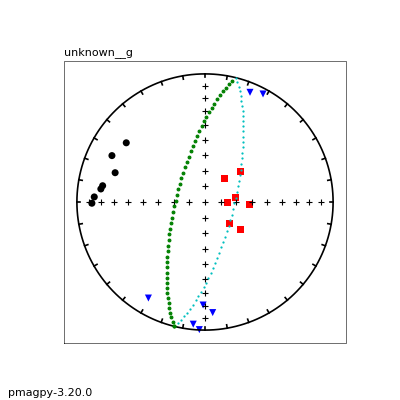

In [60]:
Image("unknown_g_aniso-data.png")

## Problem 2e
Repeat for the western margin.

Doing bootstrap - be patient
1  saved in  unknown_g_aniso-data.png
2  saved in  unknown_g_aniso-conf.png
3  saved in  unknown_g_aniso-tcdf.png


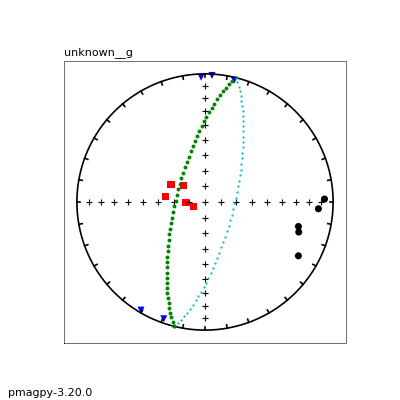

In [61]:
!aniso_magic.py -gtc 103.9    18.4 -f west_specimens.txt -crd g -par -v -sav -fmt png
Image("unknown_g_aniso-data.png")

These are downward directed directions and the green dots are on the lower trace of the dike plane.  The Eastern margin data plot to the east of the dike plane and the western side plots pretty much on the plane.  From this, we can infer that the magma was flowing nearly vertically up.  

## Problem 3

Download the datafile by clicking on the icon in the Data column from this website:  
http://earthref.org/MAGIC/1984/
and put it in a new Project Directory (here called Problem\_13.3).  We use **download_magic.py** to unpack the dataset.  

In [62]:
!download_magic.py -h


    NAME
        download_magic.py

    DESCRIPTION
        unpacks a magic formatted smartbook .txt file from the MagIC database into the
        tab delimited MagIC format txt files for use with the MagIC-Py programs.

    SYNTAX
        download_magic.py command line options]
    INPUT
        takes either the upload.txt file created by upload_magic.py or the file
        exported by the MagIC v2.2 console software (downloaded from the MagIC database
        or output by the Console on your PC).

    OPTIONS
        -h prints help message and quits
        -i allows interactive entry of filename
        -f FILE specifies input file name
        -sep write location data to separate subdirectories (Location_*)
        -O do not overwrite duplicate Location_* directories while downloading
    


In [63]:
!download_magic.py -WD Problem_13.3 -f magic_contribution_12166.txt


Using default arguments for: -F, -A, -ID, -Fsa, -Fsi, -O, -sep
working on:  'contribution'
1  records written to file  Problem_13.3/contribution.txt
contribution  data put in  Problem_13.3/contribution.txt
working on:  'locations'
1  records written to file  Problem_13.3/locations.txt
locations  data put in  Problem_13.3/locations.txt
working on:  'sites'
6  records written to file  Problem_13.3/sites.txt
sites  data put in  Problem_13.3/sites.txt
working on:  'samples'
17  records written to file  Problem_13.3/samples.txt
samples  data put in  Problem_13.3/samples.txt
working on:  'specimens'
49  records written to file  Problem_13.3/specimens.txt
specimens  data put in  Problem_13.3/specimens.txt
working on:  'measurements'
735  records written to file  Problem_13.3/measurements.txt
measurements  data put in  Problem_13.3/measurements.txt


In [64]:
!aniso_magic.py -WD Problem_13.3 -sit -sav -f Problem_13.3/specimens.txt -fmt png -par -v 

Doing bootstrap - be patient
1  saved in  Scripps Beach_as1_s_aniso-data.png
2  saved in  Scripps Beach_as1_s_aniso-conf.png
3  saved in  Scripps Beach_as1_s_aniso-tcdf.png
Doing bootstrap - be patient
1  saved in  Scripps Beach_as2_s_aniso-data.png
2  saved in  Scripps Beach_as2_s_aniso-conf.png
3  saved in  Scripps Beach_as2_s_aniso-tcdf.png
Doing bootstrap - be patient
1  saved in  Scripps Beach_as3_s_aniso-data.png
2  saved in  Scripps Beach_as3_s_aniso-conf.png
3  saved in  Scripps Beach_as3_s_aniso-tcdf.png


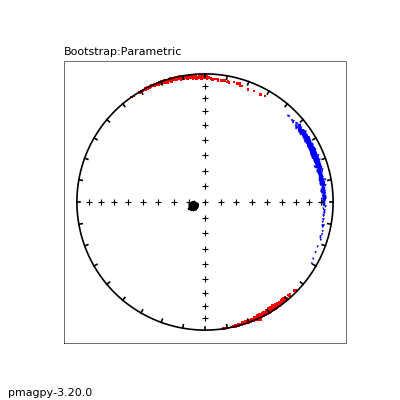

In [65]:
Image("Scripps Beach_as1_s_aniso-conf.png")


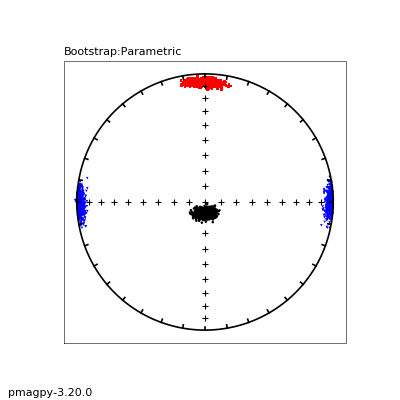

In [66]:
Image("Scripps Beach_as2_s_aniso-conf.png")


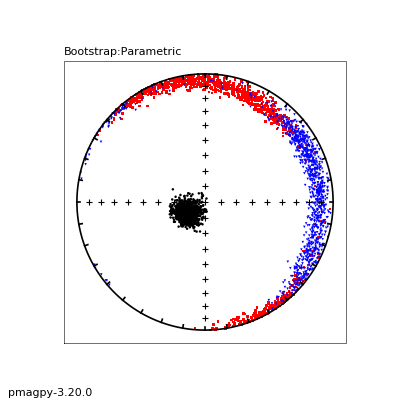

In [67]:
Image("Scripps Beach_as3_s_aniso-conf.png")

Site as3 has an oblate fabric because the maxima (red squares) and intermediate (blue triangles) over lap and are not distinct.  This is also apparent in the plots of cdfs of bootstrapped eigenvalues: 

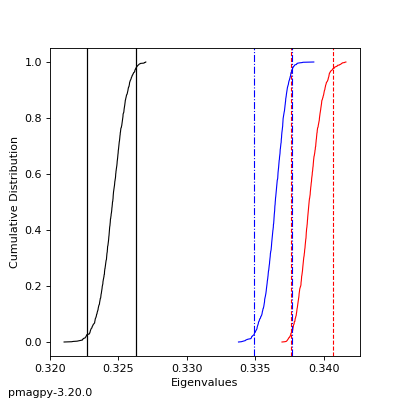

In [68]:
Image('Scripps Beach_as3_s_aniso-tcdf.png')

So as3 is a primary sedimentary fabric.  The other two are more (as2) or less (as1) disturbed.  The site as1 must be the cryptoslump.  